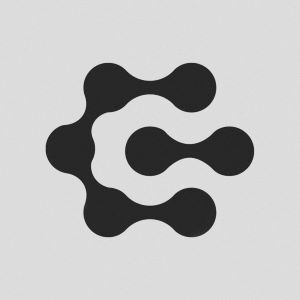

----

##**Importing Libraries and Reading data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import scipy.stats as stats
import random
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv("/content/Student_mentalHealth_data(1).csv")

----

# **Data Overview.**

In [ ]:
df.head()

,Age,Gender,Relationship_Status,Course,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Social_Support,Family_History,Financial_Stress
0,20.0,Female.,In a Relationship.,Computer Science,3.756,4.0,1.0,2.0,Average.,Low.,Average.,Not sure.,1.0
1,21.0,Female.,Single.,Computer Science,3.706,5.0,3.0,5.0,Average.,Average.,Average.,No.,1.0
2,20.0,Female.,Single.,Computer Science,2.86,3.0,2.0,4.0,Average.,Average.,High.,Yes.,1.0
3,21.0,male.,In a Relationship.,Computer Science,3.91,4.0,3.0,3.0,Poor.,High.,Average.,No.,3.0
4,21.0,Female.,Single.,other,NaN,3.0,4.0,0.0,Average.,Average.,High.,Yes.,5.0


In [ ]:
df.shape

(7159, 13)

* Dataset consists of **```7159 rows```** and **```13 columns```**.

## **Data Description :**


* **Age** : Represents the age of the individual participating in the survey.

* **Gender** :  Indicates the gender identity of the individual (e.g., Male, Female)

* **Relationship_Status** : Describes whether the individual is single, in a relationship.

* **Course** : Refers to the academic program or course of study the individual is enrolled in.

* **CGPA** : Stands for Cumulative Grade Point Average, a measure of academic performance.

* **Stress_Level** : Represents the perceived level of stress experienced by the individual.

* **Depression_Score** : Indicates the severity of depressive symptoms experienced by the individual, often measured using standardized scales.

* **Anxiety_Score** : Indicates the severity of anxiety symptoms experienced by the individual, often measured using standardized scales.

* **Sleep_Quality** : Represents the subjective assessment of the quality of sleep experienced by the individual.

* **Physical_Activity** : Indicates the level of physical activity or exercise habits of the individual.

* **Social_Support** : Reflects the perceived level of social support available to the individual.

* **Family_History**: Indicates whether the individual has a family history of certain medical conditions or mental health issues.

* **Financial_Stress** : Reflects the level of financial stress experienced by the individual, often related to economic factors such as income, debt, etc.

----

Checking for columns datatypes and entries.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7159 entries, 0 to 7158
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  7159 non-null   float64
 1   Gender               7159 non-null   object 
 2   Relationship_Status  7159 non-null   object 
 3   Course               7159 non-null   object 
 4   CGPA                 7137 non-null   object 
 5   Stress_Level         7159 non-null   float64
 6   Depression_Score     7159 non-null   float64
 7   Anxiety_Score        7159 non-null   float64
 8   Sleep_Quality        7159 non-null   object 
 9   Physical_Activity    7159 non-null   object 
 10  Social_Support       7158 non-null   object 
 11  Family_History       7159 non-null   object 
 12  Financial_Stress     7159 non-null   float64
dtypes: float64(5), object(8)
memory usage: 727.2+ KB


**General dataset Overview :**
* ```CGPA'``` column has unexpected data type 'object' instead of numeric (float64), potentially indicating non-numeric or mixed data.

* ```'CGPA' and 'Social_Support'``` columns have missing values *(nans)*, which may require handling during analysis.

----

Descriptive statistics for numerical columns.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,7159.0,22.947758,3.840900,14.0,20.0,22.0,25.0,35.0
Stress_Level,7159.0,2.442520,1.633339,0.0,1.0,2.0,4.0,5.0
Depression_Score,7159.0,2.254784,1.621027,0.0,1.0,2.0,3.0,5.0
Anxiety_Score,7159.0,2.309540,1.622525,0.0,1.0,2.0,4.0,5.0
Financial_Stress,7159.0,2.451599,1.705430,0.0,1.0,2.0,4.0,5.0


**Age Distribution :**
* The average age of the individuals in the dataset is approximately 23 years, with a standard deviation of about 4 years.
* The ages range from a minimum of 14 years to a maximum of 35 years, indicating a relatively wide age range, and also indicating that these minimum and maximum values might suggest some errors,as this data is for college students.
* The majority of individuals fall within the range of 20 to 25 years, with the median age (50th percentile) being 22 years.

**Stress Levels :**
* On average, individuals in the dataset report a stress level of around 2.44, with a standard deviation of approximately 1.63.
* Stress levels range from 0 to 5, with the majority of individuals reporting stress levels between 1 and 4.
* The distribution appears to be positively skewed, with more individuals reporting lower stress levels.

**Depression Scores and Anxiety Scores :**

* The average depression score is about 2.25, and the average anxiety score is around 2.31.
* Similar to stress levels, depression and anxiety scores range from 0 to 5, with the majority of individuals reporting scores between 1 and 4.
* There is a moderate positive correlation between stress levels, depression scores, and anxiety scores, indicating that individuals with higher stress levels tend to report higher levels of depression and anxiety.

**Financial Stress :**

* The average financial stress score is approximately 2.45, with a standard deviation of about 1.71.
* Financial stress levels range from 0 to 5, with most individuals reporting scores between 1 and 4.
* Financial stress appears to be slightly higher on average compared to general stress levels, depression scores, and anxiety scores.

----

Deescriptive statistics for categorical columns.

In [ ]:
df.describe(include='O').T

,count,unique,top,freq
Gender,7159,4,Male,3547
Relationship_Status,7159,6,Single,3574
Course,7159,7,Medical,2107
CGPA,7137,177,4.0,332
Sleep_Quality,7159,6,Good,3589
Physical_Activity,7159,6,Moderate,3521
Social_Support,7158,6,Moderate,3470
Family_History,7159,5,No,4866


**Gender Distribution :**
* The dataset  consists of 7159 individuals, with males being the predominant gender.
* The presence of four unique gender values suggests diversity in gender representation, highlighting the need for further examination to address potential errors or anomalies.

**Relationship Status :**

* The majority of individuals in the dataset are single, comprising the most frequent relationship status.

**Course Enrollment :**

* The dataset contains information about individuals enrolled in seven different courses, where a significant portion of the dataset comprises individuals studying in the **```Medical```** field.

**Sleep Quality, Physical Activity, and Social Support :**

* Sleep quality, physical activity level, and social support exhibit similar patterns, with multiple categories indicating diverse levels of each attribute.
* **"Good"** sleep quality and **"Moderate"** physical activity are the most frequently reported levels.


-----

# **Data Preprocessing.**

##**Checking for nulls**

In [ ]:
df.isnull().sum()

Age                     0
Gender                  0
Relationship_Status     0
Course                  0
CGPA                   22
Stress_Level            0
Depression_Score        0
Anxiety_Score           0
Sleep_Quality           0
Physical_Activity       0
Social_Support          1
Family_History          0
Financial_Stress        0
dtype: int64

we have nulls in CGPA and social support columns only.

In [ ]:
df.isnull().sum()/df.shape[0]*100

Age                    0.000000
Gender                 0.000000
Relationship_Status    0.000000
Course                 0.000000
CGPA                   0.307305
Stress_Level           0.000000
Depression_Score       0.000000
Anxiety_Score          0.000000
Sleep_Quality          0.000000
Physical_Activity      0.000000
Social_Support         0.013968
Family_History         0.000000
Financial_Stress       0.000000
dtype: float64

* Percentage of null values in both columns is very small, less than 1%, we may opt for handling them through removal or replacement using techniques that match the nature of each column

----

## CGPA

In [ ]:
df['CGPA'].value_counts().sort_index(ascending=False).head(10)

~3.44           1
very good       1
Cgpa:2.032      1
B               1
4.0           332
3.99           27
3.98           29
3.97           26
3.96           27
3.95           31
Name: CGPA, dtype: int64

* The `'CGPA'` column contains unexpected entries such as (~3.44 , verygood) , leading to its datatype being object. To address this issue, we need to handle these values by gaining an understanding of the nature of GPA values and convert it to int.

In [ ]:
df['CGPA'] = df['CGPA'].replace('very good', '3.3')

df['CGPA'] = df['CGPA'].replace('B', '3')

df['CGPA'] = df['CGPA'].replace('~3.44', '3.44')

df['CGPA'] = df['CGPA'].replace('Cgpa:2.032', '2.032')


df['CGPA'].value_counts().sort_index(ascending=False)

4.0      332
3.99      27
3.98      29
3.97      26
3.96      27
        ... 
2          2
1.8        2
1.7        1
1.6        1
1.576      1
Name: CGPA, Length: 173, dtype: int64

In [ ]:
df['CGPA'].isnull().sum()

21

Handling null values within this column.

In [ ]:
rows_with_null = df[df['CGPA'].isnull()]

# Print rows containing null values
(rows_with_null)

,Age,Gender,Relationship_Status,Course,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Social_Support,Family_History,Financial_Stress
4,21.0,Female,Single,Others,NaN,3.0,4.0,0.0,Average,Average,High,Yes,5.0
44,21.0,Female,In a Relationship,Computer Science,NaN,5.0,5.0,5.0,Good,Low,Low,No,4.0
49,19.0,Male,Single,Computer Science,NaN,3.0,2.0,3.0,Good,High,Average,No,3.0
58,22.0,Male,Single,Computer Science,NaN,4.0,2.0,5.0,Average,Low,High,Not sure,3.0
66,19.0,Male,Single,Others,NaN,3.0,4.0,5.0,Poor,Low,Average,Not sure,0.0
70,21.0,Male,Single,Engineering,NaN,4.0,4.0,3.0,Poor,Average,Low,No,0.0
102,20.0,Female,Single,Business,NaN,2.0,2.0,2.0,Average,High,Average,Not sure,2.0
110,20.0,Female,Single,Others,NaN,5.0,3.0,5.0,Poor,Low,NaN,Not sure,2.0
116,20.0,Female,Single,Law,NaN,2.0,0.0,1.0,Good,Low,High,No,2.0
148,28.0,Female,In a Relationship,Engineering,NaN,3.0,0.0,3.0,Average,Moderate,Moderate,Yes,0.0


Instead of deleting rows with null values or imputing them with mean or random values, we seek to enhance accuracy by examining the relationship between the course and the CGPA of these records. Our approach involves imputing each missing CGPA value with the average CGPA value of its corresponding course.


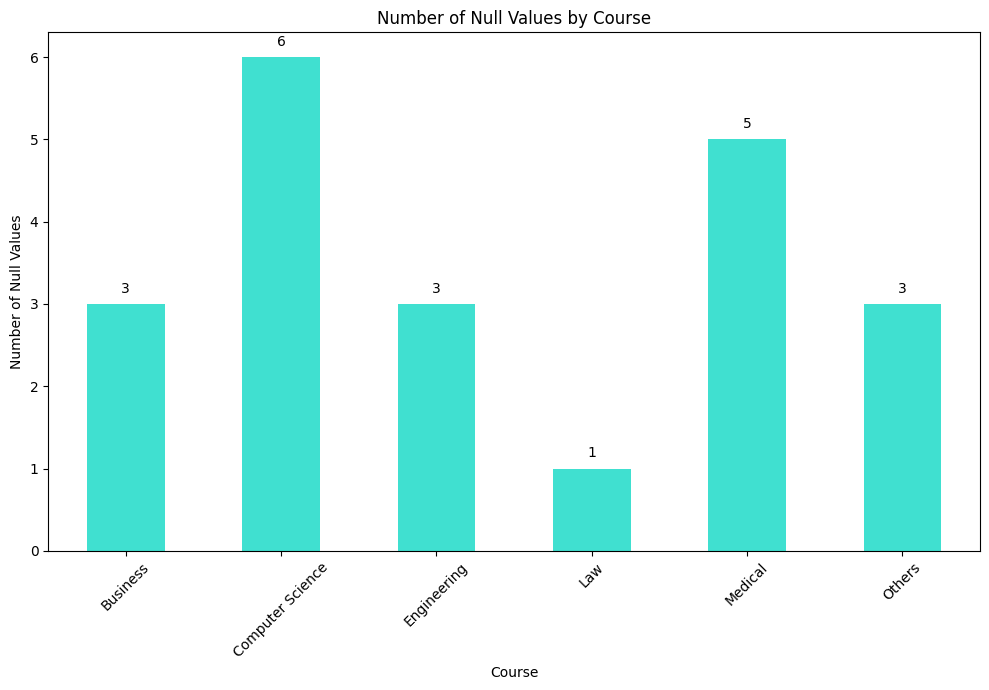

In [ ]:
grouped = df.groupby('Course')['CGPA'].apply(lambda x: (x.isnull().sum()))

# Plot the percentages
ax = grouped.plot(kind='bar', figsize=(10, 7),color = 'turquoise')
plt.title('Number of Null Values by Course')
plt.xlabel('Course')
plt.ylabel('Number of Null Values')
plt.xticks(rotation=45)

# Annotate the plot with counts
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, str(int(i.get_height())), ha='center', va='bottom')

plt.tight_layout()
plt.show()

* We must separate all Courses and analyze the distribution of their CGPA values in order to impute the nulls using the mean or median of the CGPA of each college, not the entire population.


we will create a dictinary with dataframes for each course.

In [ ]:
# Create dictionaries to store DataFrames
course_dfs = {course: df[df['Course'] == course] for course in df['Course'].unique()}

course_dfs.keys()

dict_keys(['Computer Science', 'Others', 'Business', 'Medical', 'Engineering', 'Law'])

Checking the distirbution of CGPA column for each course.

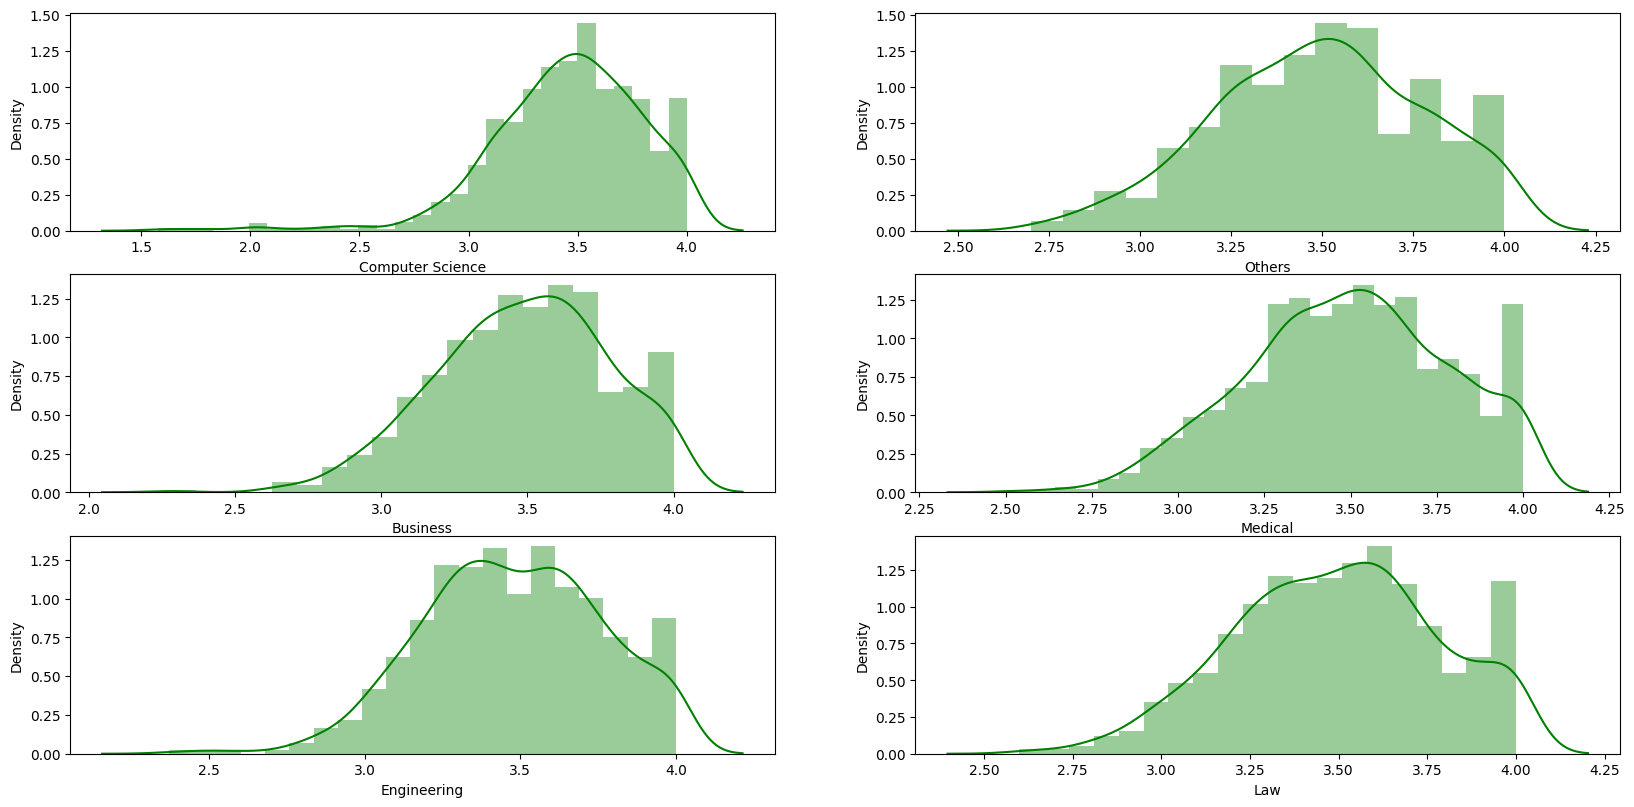

In [ ]:
plt.figure(figsize=(20,30))
for i, data in enumerate(course_dfs.keys()):
    ax = plt.subplot(9, 2, i+1)
    sns.distplot(course_dfs[data]['CGPA'], ax=ax,color='green')
    plt.xlabel(data)

plt.show()

* Since the CGPA distribution for all majors appears to be left-skewed, the optimal approach is to impute the null values for each major using the median of their respective distributions.

In [ ]:
computer_science_median = course_dfs['Computer Science']['CGPA'].median()

others_median = course_dfs['Others']['CGPA'].median()

business_median = course_dfs['Business']['CGPA'].median()

medical_median = course_dfs['Medical']['CGPA'].median()

eng_median = course_dfs['Engineering']['CGPA'].median()

law_median = course_dfs['Law']['CGPA'].median()

In [ ]:
print("Computer Science Median CGPA: ",computer_science_median)
print("Others Median CGPA: ",others_median)
print("Business Median CGPA: ",business_median)
print("Medical Median CGPA: ",medical_median)
print("Engineering Median CGPA: ",eng_median)
print("Law Median CGPA: ",law_median)

Computer Science Median CGPA:  3.48
Others Median CGPA:  3.5
Business Median CGPA:  3.51
Medical Median CGPA:  3.5
Engineering Median CGPA:  3.48
Law Median CGPA:  3.5


In [ ]:
course_medians = {'Computer Science': computer_science_median, 'Business': business_median, 'Medical': medical_median, 'Engineering': eng_median, 'Law': law_median,'Others': others_median}
df['CGPA'].fillna(df['Course'].map(course_medians), inplace=True)
df['CGPA'].isnull().sum()

0

* CGPA missing values have been replaced by the median of each major's CGPA distribution.

##**Checking for Duplicated rows**

In [ ]:
df.duplicated().sum()

0

* Data is free from any duplicates.

----

##**Checking the distribution and values of each column**

### 1. Age

In [ ]:
df['Age'].value_counts()

21.0    822
20.0    782
18.0    746
19.0    727
22.0    700
23.0    642
24.0    539
26.0    457
25.0    455
27.0    323
28.0    260
29.0    189
30.0    162
31.0    124
32.0     98
33.0     55
34.0     45
35.0     31
14.0      1
15.0      1
Name: Age, dtype: int64

* Substituting the age 20.5 by the approximated number to make it easier to work with which is 20

In [ ]:
incorrect_vals=[20.5]

df.loc[df['Age'].isin(incorrect_vals),'Age']=20
df['Age'].value_counts()

21.0    822
20.0    782
18.0    746
19.0    727
22.0    700
23.0    642
24.0    539
26.0    457
25.0    455
27.0    323
28.0    260
29.0    189
30.0    162
31.0    124
32.0     98
33.0     55
34.0     45
35.0     31
14.0      1
15.0      1
Name: Age, dtype: int64

We identified two entries with ages 14 and 15, which are not expected in our dataset since it pertains to college students. Therefore, we will remove this unrealistic data as there are no students in the university stage with ages of 14 and 15.

In [ ]:
df = df[(df['Age'] != 14) & (df['Age'] != 15)]

<Axes: xlabel='Age', ylabel='Count'>

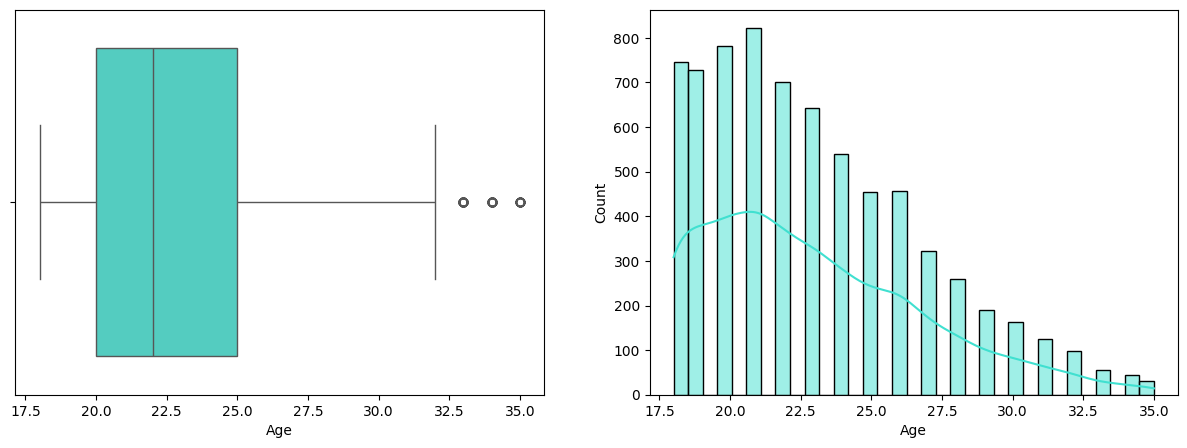

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x = df['Age'],color='turquoise')
plt.subplot(1,2,2)
sns.histplot(x = df['Age'], kde=True,color='turquoise')

we can see here that the age column has outliers which are greater than 32, but we won't remove them because they are realistic since students with this age can be doing masters or starting college at late age, and also w can see from the second plot that the age column is right skewed..and this can be because of the outliers.

### 2. Gender.

In [ ]:
df['Gender'].value_counts()

Male       3547
Female     3475
male.        73
Female.      62
Name: Gender, dtype: int64

To standardize the classes in the 'Gender' column, we will unify them as follows since they represent the same class:

* Female for all instances of "Female" and "Female."
* Male for all instances of "Male" and "male."

In [ ]:
df = df.applymap(lambda x: x.rstrip('.') if isinstance(x, str) else x)

In [ ]:
df['Gender'] = df['Gender'].replace('male', 'Male')

df['Gender'].value_counts()

Male      3620
Female    3537
Name: Gender, dtype: int64

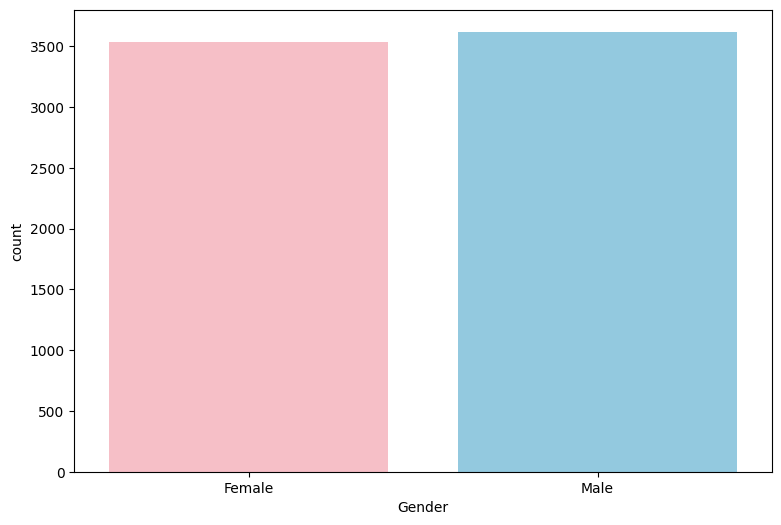

In [ ]:
plt.figure(figsize=(9,6))
sns.countplot(x='Gender', data = df,palette = {'Male': 'skyblue', 'Female': 'lightpink'})
plt.show()

we can see here that our data nearly has equal counts of males and females.

### 3. Relationship status

In [ ]:
df['Relationship_Status'].unique()

array(['In a Relationship', 'Single', 'Married'], dtype=object)

In [ ]:
df = df.applymap(lambda x: x.rstrip('.') if isinstance(x, str) else x)

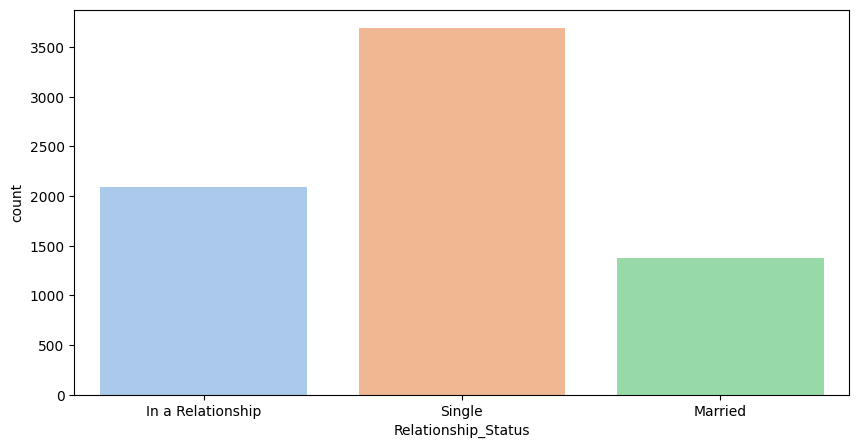

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x='Relationship_Status', data=df,palette='pastel')
plt.show()

we can see here that most of our students are single.

### 4. Course

In [ ]:
df['Course'].unique()

array(['Computer Science', 'other', 'Business', 'Medical', 'Engineering',
       'Law', 'Others'], dtype=object)

we can notice here that there are two values similar (other, Others)..se we will replace other with Others.

we can see here that the leading two majors in our data are medical and law.

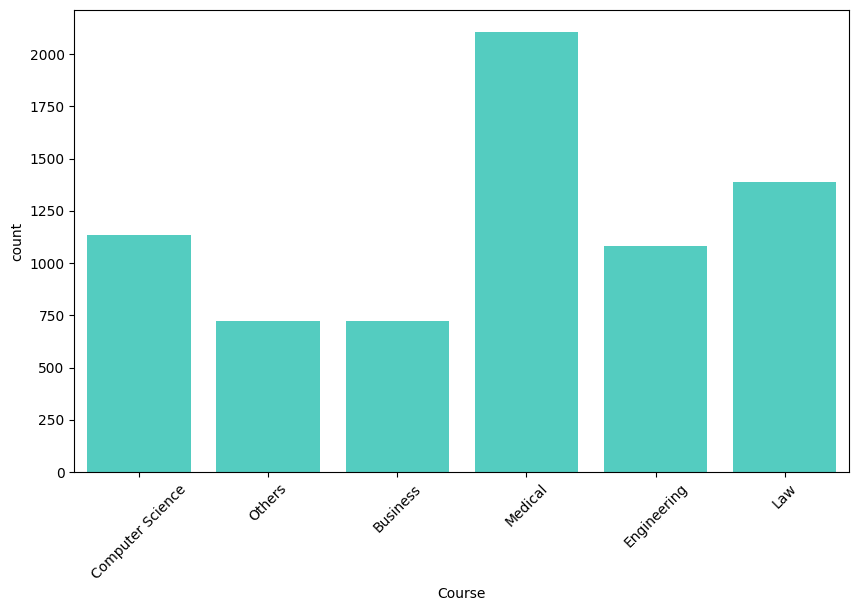

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Course', data = df,color = 'turquoise')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['Course'] = df['Course'].replace('other', 'Others')

### Stress level.

In [ ]:
df['Stress_Level'].unique()

array([4., 5., 3., 1., 2., 0.])

<Axes: xlabel='Stress_Level', ylabel='count'>

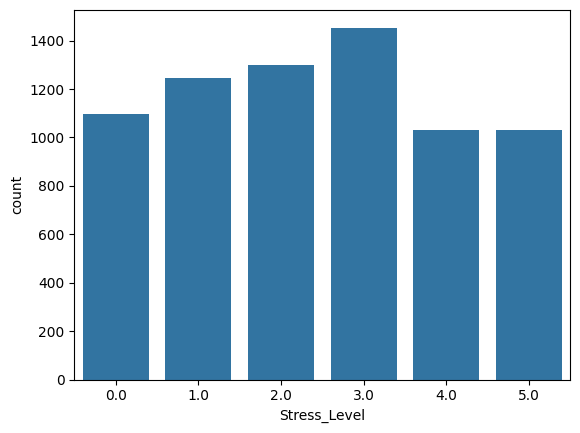

In [ ]:
sns.countplot(x='Stress_Level', data=df)

we can see here that the distribution is nearly normal and the counts of each level are so close to each other.

### Depression score

In [ ]:
df['Depression_Score'].unique()

array([1., 3., 2., 4., 5., 0.])

<Axes: xlabel='Depression_Score', ylabel='count'>

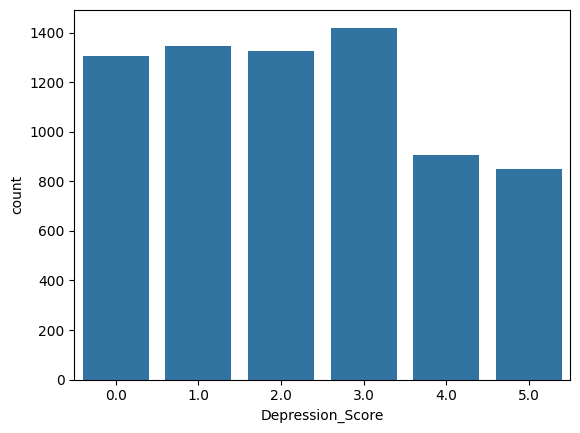

In [ ]:
sns.countplot(x='Depression_Score', data=df)

we can notice the close counts of low levels to each other but the high levels counts' are not very close to the rest.

### Anxiety score

In [ ]:
df['Anxiety_Score'].unique()

array([2., 5., 4., 3., 0., 1.])

<Axes: xlabel='Anxiety_Score', ylabel='count'>

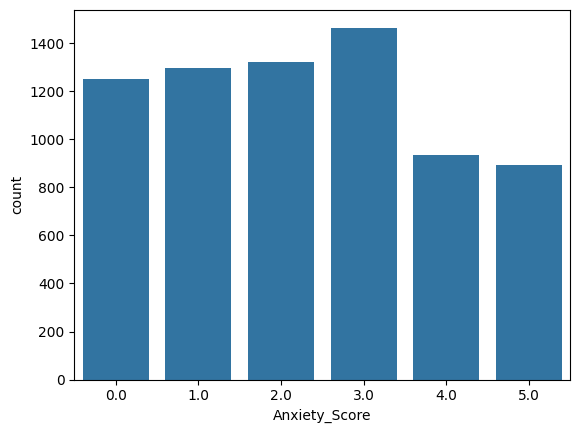

In [ ]:
sns.countplot(x='Anxiety_Score', data=df)

same as the depression.

### Sleep quality

In [ ]:
df['Sleep_Quality'].unique()

array(['Average', 'Poor', 'Good'], dtype=object)

<Axes: xlabel='Sleep_Quality', ylabel='count'>

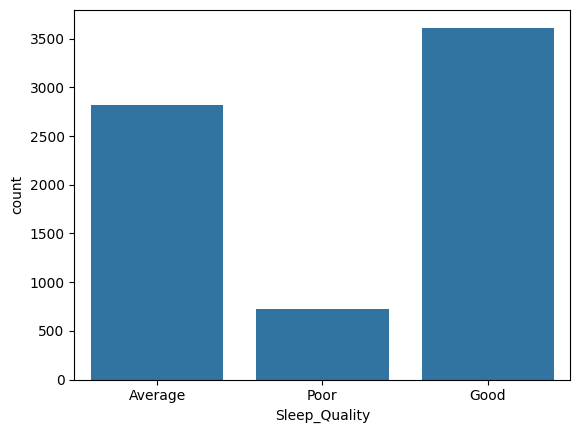

In [ ]:
sns.countplot(x='Sleep_Quality', data=df)

we can notice from this plot that id the values were arranged asscendingly this distribution would have been left skewed which indicates that most of our students have good sleep.

### Physical activity

In [ ]:
df['Physical_Activity'].unique()

array(['Low', 'Average', 'High', 'Moderate'], dtype=object)

we can notice here that there are two values similar to eachother (average, moderate)so we will replace one of them with the other.

In [ ]:
df['Physical_Activity'] = df['Physical_Activity'].replace('Moderate', 'Average')

<Axes: xlabel='Physical_Activity', ylabel='count'>

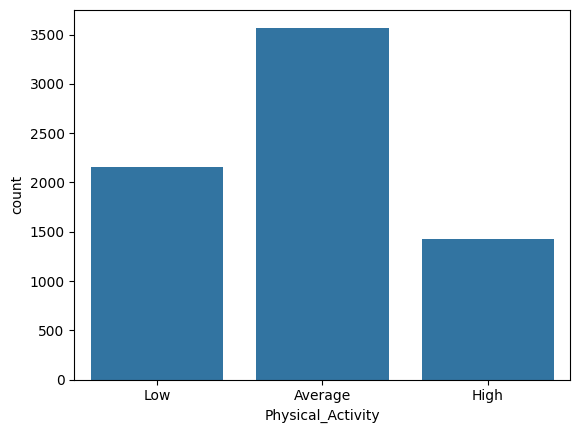

In [ ]:
sns.countplot(x='Physical_Activity', data=df)

the distribution is not skewed, most of our students have average sleep.

### Social support

let's now see the nulls in the social support column.

In [ ]:
df[df['Social_Support'].isnull()]

,Age,Gender,Relationship_Status,Course,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Social_Support,Family_History,Financial_Stress
110,20.0,Female,Single,Others,3.5,5.0,3.0,5.0,Poor,Low,NaN,Not sure,2.0


In [ ]:
df['Social_Support'].value_counts()

Moderate    3470
High        2215
Low         1400
Average       71
Name: Social_Support, dtype: int64

same problem of similar values so we will replace one of them with the other.

In [ ]:
df['Social_Support'] = df['Social_Support'].replace('Moderate', 'Average')

after looking to the row containing the null we can conclude from the other values that this student's mental health isn't really good, so we will consider that he meant with null is that he doesn't have any social support and replace the null with least value possible which is 'low'.

In [ ]:
df.loc[df['Social_Support'].isnull(),'Social_Support']='Low'

<Axes: xlabel='Social_Support', ylabel='count'>

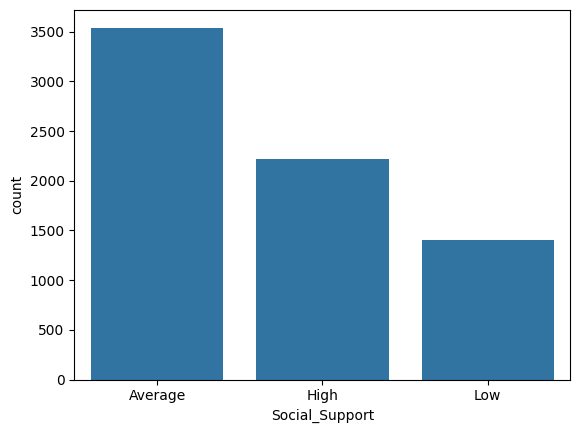

In [ ]:
sns.countplot(x='Social_Support', data=df)

also not skewed, most of the students have average social support.

### Family history

In [ ]:
df['Family_History'].value_counts()

No          4931
Yes         2186
Not sure      40
Name: Family_History, dtype: int64

to reduce the variety of the values in the column and not confuse the model with only 40 values of 'not sure' we will replace it with yes, since even if someone is not sure then there is a probability that someone in the family has issues, so it's prefered to replace it with yes.

In [ ]:
df['Family_History'] = df['Family_History'].replace('Not sure', 'Yes')

<Axes: xlabel='Family_History', ylabel='count'>

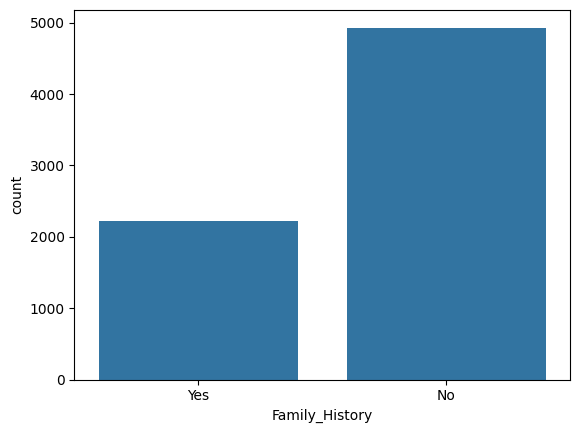

In [ ]:
sns.countplot(x='Family_History', data=df)

most of our students doesn't have family members with mental history.

### Financial stress

In [ ]:
df['Financial_Stress'].value_counts()

0.0    1248
2.0    1207
1.0    1206
4.0    1188
3.0    1181
5.0    1127
Name: Financial_Stress, dtype: int64

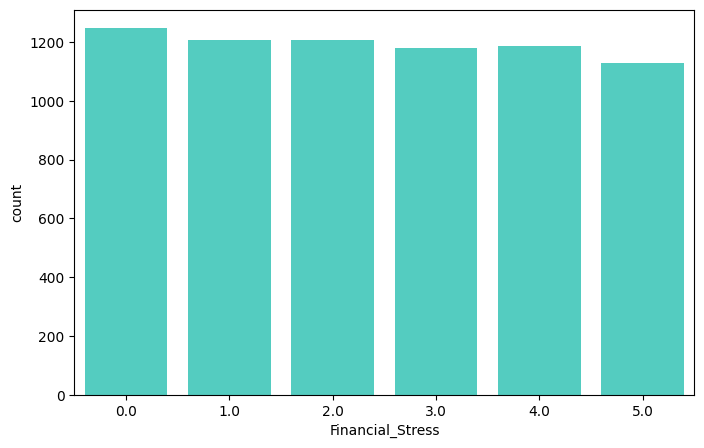

In [ ]:
plt.figure(figsize = (8,5))
sns.countplot(x='Financial_Stress', data=df,color='turquoise')
plt.show()

all the levels are very similar in the counts.

# **Exploratory Data Analysis**

In [ ]:
df.head()

,Age,Gender,Relationship_Status,Course,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Social_Support,Family_History,Financial_Stress
0,20.0,Female,In a Relationship,Computer Science,3.756,4.0,1.0,2.0,Average,Low,Average,Yes,1.0
1,21.0,Female,Single,Computer Science,3.706,5.0,3.0,5.0,Average,Average,Average,No,1.0
2,20.0,Female,Single,Computer Science,2.86,3.0,2.0,4.0,Average,Average,High,Yes,1.0
3,21.0,Male,In a Relationship,Computer Science,3.91,4.0,3.0,3.0,Poor,High,Average,No,3.0
4,21.0,Female,Single,Others,3.5,3.0,4.0,0.0,Average,Average,High,Yes,5.0


In [ ]:
# Convert 'CGPA' column to float

df['CGPA'] = df['CGPA'].astype(float)

In [ ]:
fig = px.pie(df, names='Relationship_Status', title='Relationship Status Distribution',
             labels={'Relationship_Status': 'Relationship_Status'},
             color='Relationship_Status',
            color_discrete_sequence=px.colors.qualitative.Pastel)

fig.show()

* More than half of the students in the dataset are identified as single.

In [ ]:
relationship_status_with_stress = df.groupby('Relationship_Status')['Stress_Level'].mean().reset_index()
relationship_status_with_stress

,Relationship_Status,Stress_Level
0,In a Relationship,2.423518
1,Married,2.445660
2,Single,2.451543


There appears to be no significant impact of relationship status on stress levels, as the average stress levels across all relationship statuses are relatively consistent.

* This finding suggests that stress among academic students may be more strongly influenced by factors other than their relationships and social lives.

In [ ]:
fig = px.pie(df, names='Gender', title='Gender Distribution',
             labels={'Gender': 'Gender Distribution'},
             color='Gender',
             color_discrete_sequence=px.colors.qualitative.Plotly_r)
# Show the plot
fig.show()

In [ ]:
avg_stress_per_gender = df.groupby('Gender')['Stress_Level'].mean().reset_index()
avg_stress_per_gender

,Gender,Stress_Level
0,Female,2.441617
1,Male,2.442818


In [ ]:
fig = px.histogram(df, x='Course', color='Course', title='Distribution of Courses',
                   color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

In [ ]:
avg_stress_per_course = df.groupby('Course')['Stress_Level'].mean().reset_index().sort_values(by='Stress_Level',ascending=False)
avg_stress_per_course

,Course,Stress_Level
4,Medical,3.212625
1,Computer Science,2.166520
3,Law,2.121846
0,Business,2.114799
2,Engineering,2.103512
5,Others,2.078838


In [ ]:
top_stressed_courses = avg_stress_per_course.sort_values(by='Stress_Level').head(10)


fig = px.bar(top_stressed_courses, x='Stress_Level', y='Course', orientation='h',
             title='Top Highest Stressed Courses', labels={'Stress_Level': 'Average Stress Level', 'Course': 'Course'},color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

In [ ]:
# high_gpa_students = df[df['CGPA'] >= 3.0]
# low_gpa_students = df[df['CGPA'] < 3.0]

# avg_stress_high_gpa = high_gpa_students['Stress_Level'].mean()
# avg_stress_low_gpa = low_gpa_students['Stress_Level'].mean()

# df_avg_stress_gpa = pd.DataFrame({
#     'GPA Group': ['High GPA', 'Low GPA'],
#     'Average Stress Level': [avg_stress_high_gpa, avg_stress_low_gpa]
# })

# value_mapping = {'High GPA': 'High GPA ( >= 3.0)', 'Low GPA': 'Low GPA  (< 3.0)'}

# # Replace the values inside the 'GPA Group' column
# df_avg_stress_gpa['GPA Group'] = df_avg_stress_gpa['GPA Group'].replace(value_mapping)
# df_avg_stress_gpa


In [ ]:
df['GPA_Group'] = pd.cut(df['CGPA'], bins=[0, 2.9, float('inf')], labels=['Low GPA', 'High GPA'])

avg_stress_per_group = df.groupby('GPA_Group')['Stress_Level'].mean().reset_index()

fig = px.bar(avg_stress_per_group, x='GPA_Group', y='Stress_Level',
             labels={'GPA_Group': 'GPA Group', 'Stress_Level': 'Average Stress Level'},
             color='GPA_Group', color_discrete_sequence=px.colors.qualitative.Pastel,
             title='Average Stress Level by GPA Group')
fig.show()

In [ ]:
df.head()

,Age,Gender,Relationship_Status,Course,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Social_Support,Family_History,Financial_Stress,GPA_Group
0,20.0,Female,In a Relationship,Computer Science,3.756,4.0,1.0,2.0,Average,Low,Average,Yes,1.0,High GPA
1,21.0,Female,Single,Computer Science,3.706,5.0,3.0,5.0,Average,Average,Average,No,1.0,High GPA
2,20.0,Female,Single,Computer Science,2.860,3.0,2.0,4.0,Average,Average,High,Yes,1.0,Low GPA
3,21.0,Male,In a Relationship,Computer Science,3.910,4.0,3.0,3.0,Poor,High,Average,No,3.0,High GPA
4,21.0,Female,Single,Others,3.500,3.0,4.0,0.0,Average,Average,High,Yes,5.0,High GPA


In [ ]:
grade_ranges = [0, 2.0, 2.33, 3.0, 3.67, float('inf')]
grades = ['F', 'D', 'C', 'B',  'A']

# Create 'Grades' column based on CGPA using pd.cut
df['Grade'] = pd.cut(df['CGPA'], bins=grade_ranges, labels=grades, right=False)

In [ ]:
df.head()

,Age,Gender,Relationship_Status,Course,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Social_Support,Family_History,Financial_Stress,GPA_Group,Grade
0,20.0,Female,In a Relationship,Computer Science,3.756,4.0,1.0,2.0,Average,Low,Average,Yes,1.0,High GPA,A
1,21.0,Female,Single,Computer Science,3.706,5.0,3.0,5.0,Average,Average,Average,No,1.0,High GPA,A
2,20.0,Female,Single,Computer Science,2.860,3.0,2.0,4.0,Average,Average,High,Yes,1.0,Low GPA,C
3,21.0,Male,In a Relationship,Computer Science,3.910,4.0,3.0,3.0,Poor,High,Average,No,3.0,High GPA,A
4,21.0,Female,Single,Others,3.500,3.0,4.0,0.0,Average,Average,High,Yes,5.0,High GPA,B


In [ ]:
avg_stress_by_grades = df.groupby('Grade')['Stress_Level'].mean().reset_index().sort_values(by='Stress_Level',ascending=False)
avg_stress_by_grades

,Grade,Stress_Level
0,F,3.800000
1,D,3.600000
2,C,2.508380
3,B,2.440862
4,A,2.424514


In [ ]:
avg_stress_by_grades = avg_stress_by_grades.sort_values(by='Stress_Level').head(10)


fig = px.bar(avg_stress_by_grades, x='Stress_Level', y='Grade', orientation='h',
             title='Average Stress Level by Grade', labels={'Stress_Level': 'Average Stress Level', 'Grade': 'Grade'},color_discrete_sequence=px.colors.sequential.Burg)
fig.show()

In [ ]:
df.head()

,Age,Gender,Relationship_Status,Course,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Social_Support,Family_History,Financial_Stress,GPA_Group,Grade
0,20.0,Female,In a Relationship,Computer Science,3.756,4.0,1.0,2.0,Average,Low,Average,Yes,1.0,High GPA,A
1,21.0,Female,Single,Computer Science,3.706,5.0,3.0,5.0,Average,Average,Average,No,1.0,High GPA,A
2,20.0,Female,Single,Computer Science,2.860,3.0,2.0,4.0,Average,Average,High,Yes,1.0,Low GPA,C
3,21.0,Male,In a Relationship,Computer Science,3.910,4.0,3.0,3.0,Poor,High,Average,No,3.0,High GPA,A
4,21.0,Female,Single,Others,3.500,3.0,4.0,0.0,Average,Average,High,Yes,5.0,High GPA,B


In [ ]:
age_ranges = [(18, 19), (19, 20), (20, 22), (22, 25), (26, float('inf'))]
classifications = ['Freshmen', 'Sophomores', 'Juniors', 'Seniors', 'Masters']
5
# Function to assign academic classification based on age
def assign_classification(age):
    for i, (lower, upper) in enumerate(age_ranges):
        if lower <= age <= upper:
            return classifications[i]

# Create 'Academic_Classification' column based on age
df['Academic_Classification'] = df['Age'].apply(assign_classification)

In [ ]:
df.head(2)

,Age,Gender,Relationship_Status,Course,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Social_Support,Family_History,Financial_Stress,GPA_Group,Grade,Academic_Classification
0,20.0,Female,In a Relationship,Computer Science,3.756,4.0,1.0,2.0,Average,Low,Average,Yes,1.0,High GPA,A,Sophomores
1,21.0,Female,Single,Computer Science,3.706,5.0,3.0,5.0,Average,Average,Average,No,1.0,High GPA,A,Juniors


In [ ]:
avg_stress_by_academic_classification = df.groupby(['Academic_Classification'])['Stress_Level'].mean().reset_index().sort_values(by='Stress_Level',ascending=False)
avg_stress_by_academic_classification

,Academic_Classification,Stress_Level
0,Freshmen,2.541752
1,Juniors,2.482917
4,Sophomores,2.411765
2,Masters,2.388761
3,Seniors,2.386308


* Stress Levels in all college levels are almost the same.
* Very likely that Freshmen can be the most stressed ,as they are getting introduced to new enviroments and making new friends.

In [ ]:
fig = px.histogram(df, x='Academic_Classification', color='Academic_Classification', title='Distribution of Ages',
                   color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

In [ ]:
fig = px.histogram(df, x='Stress_Level', color='Stress_Level', title='Distribution of Stress Levels',
                   color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

In [ ]:
fig = px.histogram(df, x='Depression_Score', color='Depression_Score', title='Distribution of depression Score',
                   color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

In [ ]:
fig = px.histogram(df, x='Anxiety_Score', color='Anxiety_Score', title='Distribution of Anxiety Score',
                   color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

In [ ]:
fig = px.histogram(df, x='Financial_Stress', color='Financial_Stress', title='Distribution of Anxiety Score',
                   color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

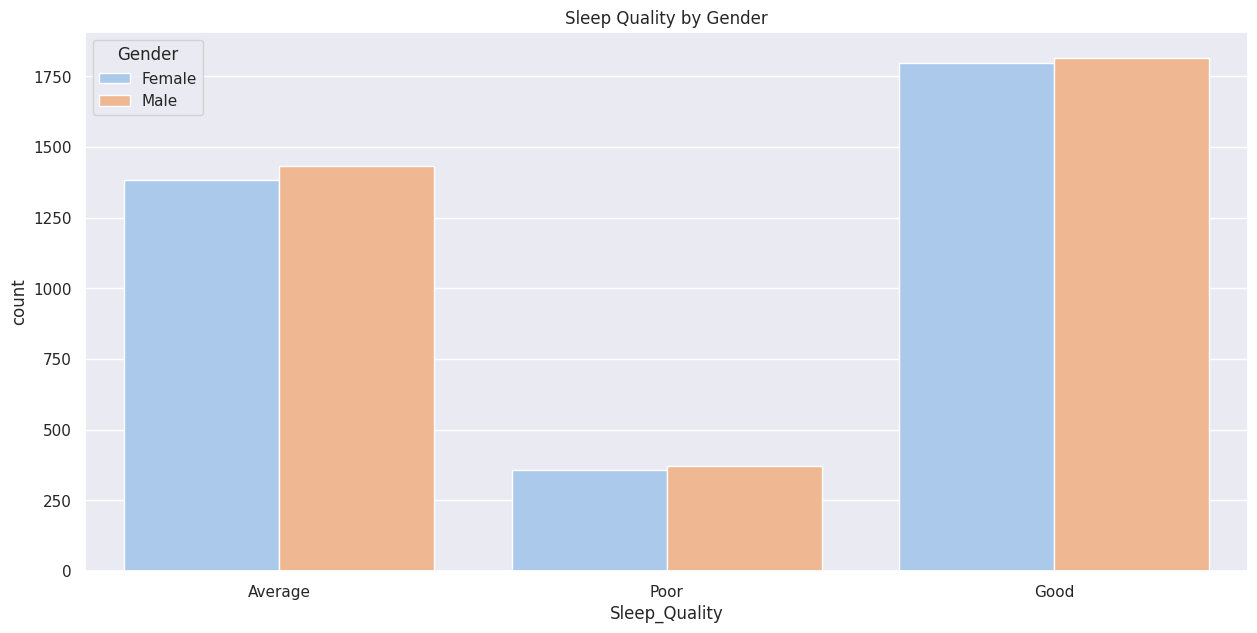

In [ ]:
plt.figure(figsize=(15,7))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Sleep_Quality", hue="Gender", data=df,palette='pastel')
plt.title("Sleep Quality by Gender")
plt.show()

Correlation visualization and analysis.

In [ ]:
corr = df.corr()
corr.T

,Age,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Financial_Stress
Age,1.000000,0.030505,-0.025364,0.000226,0.004678,-0.001016
CGPA,0.030505,1.000000,-0.009722,-0.029824,-0.004157,-0.019876
Stress_Level,-0.025364,-0.009722,1.000000,-0.037972,-0.027203,0.000399
Depression_Score,0.000226,-0.029824,-0.037972,1.000000,-0.012505,-0.009080
Anxiety_Score,0.004678,-0.004157,-0.027203,-0.012505,1.000000,-0.000907
Financial_Stress,-0.001016,-0.019876,0.000399,-0.009080,-0.000907,1.000000


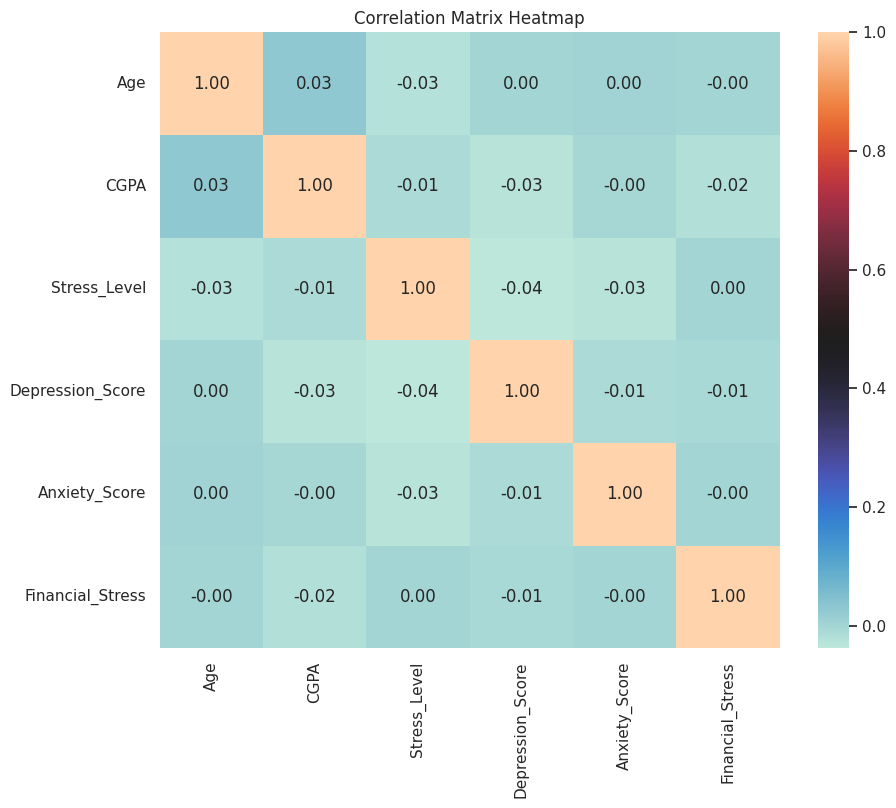

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='icefire', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
numeric_cols = df[['Age','Stress_Level','Depression_Score','Anxiety_Score','CGPA']]

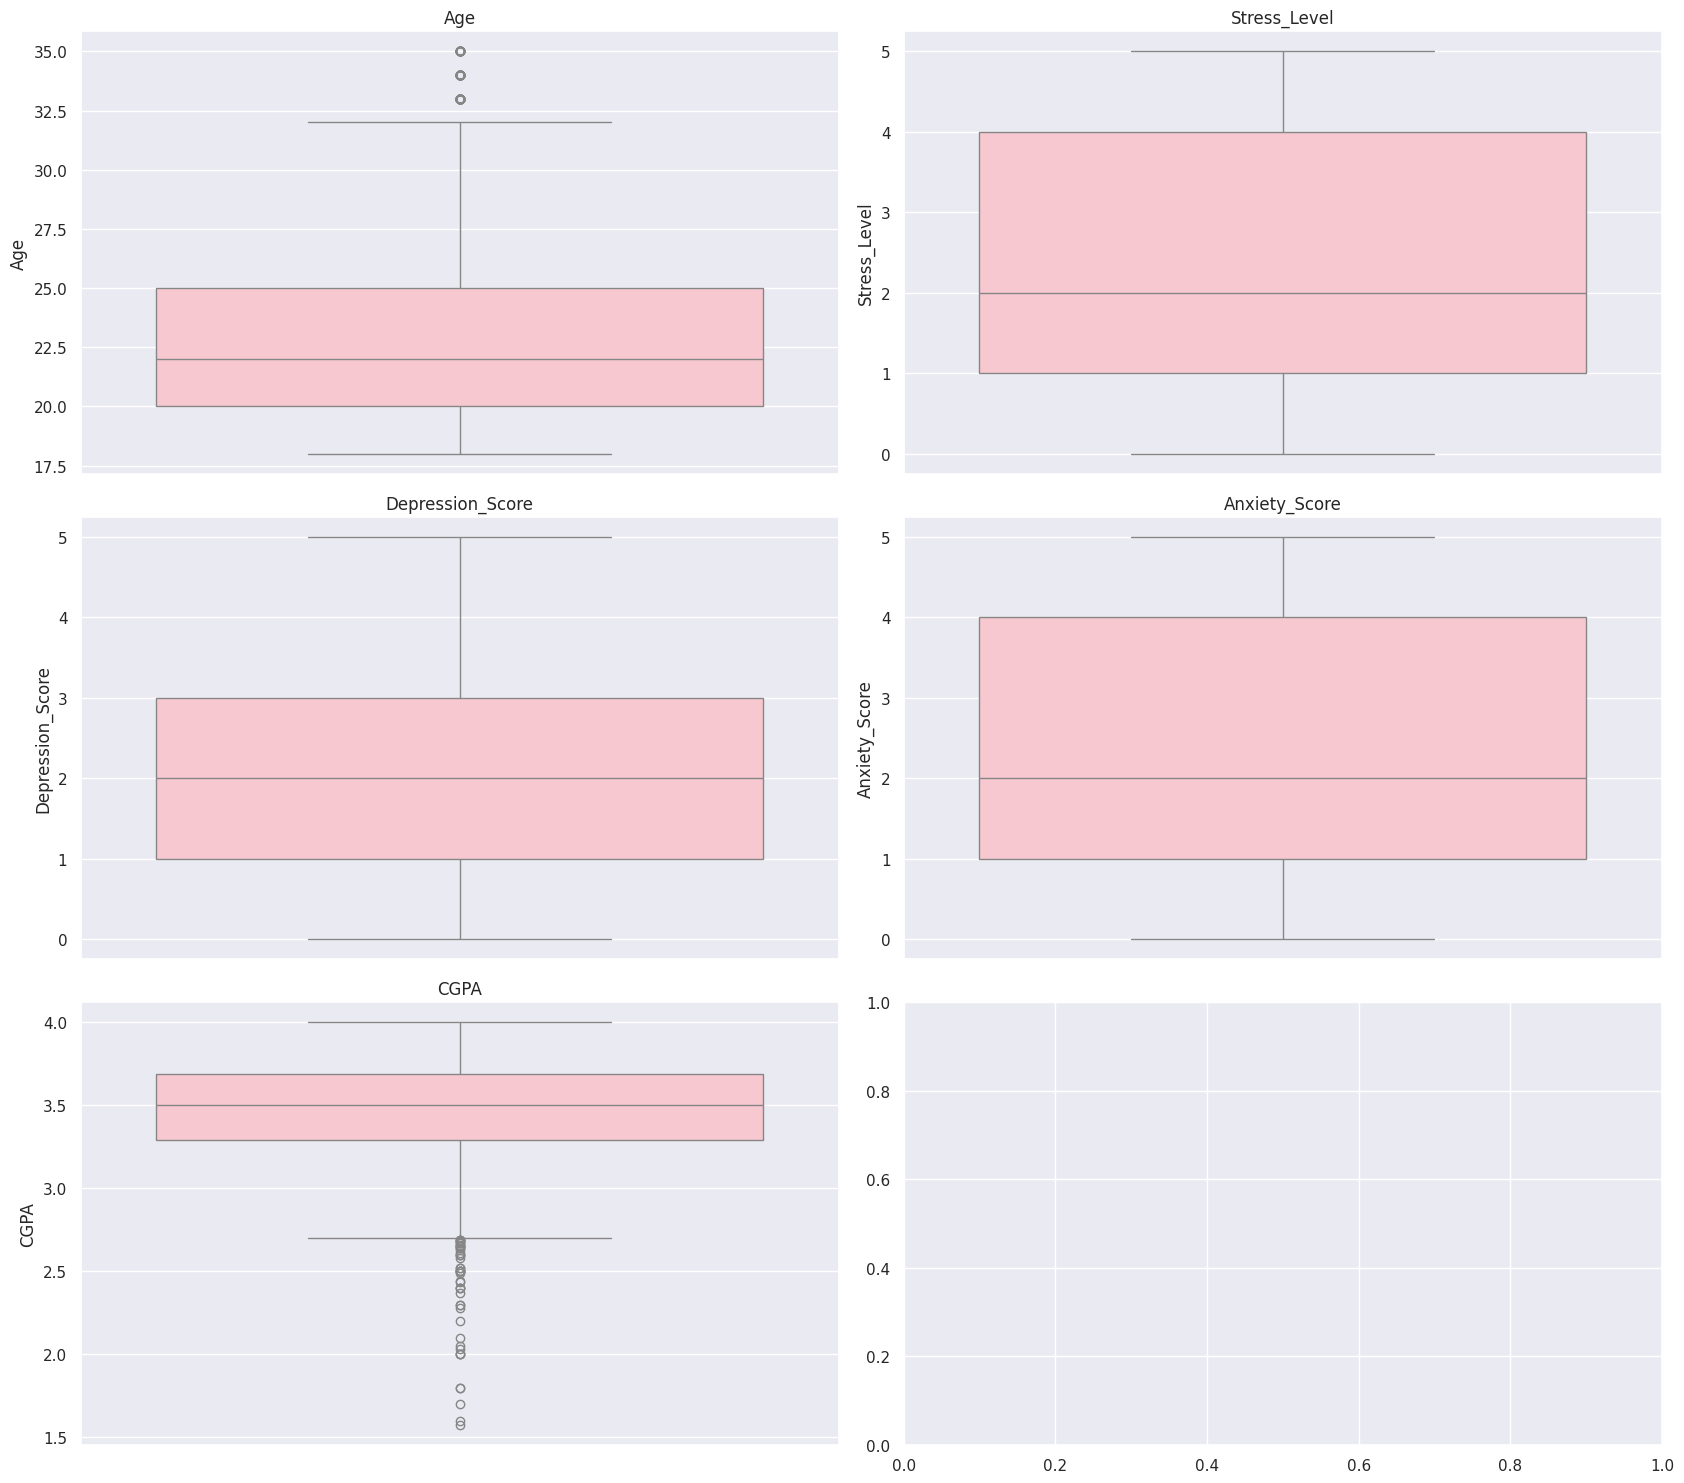

In [ ]:
num_cols = len(numeric_cols.columns)
num_rows = (num_cols + 1) // 2

fig, axs = plt.subplots(num_rows, 2, figsize=(17, 5 * num_rows))

for i in range(num_rows):
    for j in range(2):
        col_idx = i * 2 + j
        if col_idx < num_cols:
            sns.boxplot(numeric_cols.iloc[:, col_idx], ax=axs[i, j], color='pink')
            axs[i, j].set_title(numeric_cols.columns[col_idx])

plt.tight_layout()
plt.show()

In [ ]:
def find_outliers(df):

  q1=df.quantile(0.25)

  q3=df.quantile(0.75)

  IQR=q3-q1

  outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

  return outliers

In [ ]:
for col in numeric_cols.columns:
    outliers=find_outliers(df[col])
    print("Number of outliers in",col,":", str(len(outliers)),",it's Percentage is : ",str(len(outliers)*100/len(df)),"%")
    print("\n")

Number of outliers in Age : 131 ,it's Percentage is :  1.830375855805505 %


Number of outliers in Stress_Level : 0 ,it's Percentage is :  0.0 %


Number of outliers in Depression_Score : 0 ,it's Percentage is :  0.0 %


Number of outliers in Anxiety_Score : 0 ,it's Percentage is :  0.0 %


Number of outliers in CGPA : 48 ,it's Percentage is :  0.6706720693027804 %




In [ ]:
def replace_outlier(col):
    sorted(col) #sort column then get Q1, Q3 at 25% and 75% of sorted col
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [ ]:
for col in numeric_cols.drop(['Stress_Level','Depression_Score','Anxiety_Score'],axis=1):
    lower_limit, upper_limit = replace_outlier(df[col]) #lower and upper range
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

In [ ]:
df['Stress_Level'].value_counts()

3.0    1454
2.0    1299
1.0    1244
0.0    1099
5.0    1031
4.0    1030
Name: Stress_Level, dtype: int64

In [ ]:
df['Depression_Score'].value_counts()

3.0    1421
1.0    1346
2.0    1328
0.0    1306
4.0     905
5.0     851
Name: Depression_Score, dtype: int64

In [ ]:
df['Anxiety_Score'].value_counts()

3.0    1465
2.0    1320
1.0    1295
0.0    1250
4.0     935
5.0     892
Name: Anxiety_Score, dtype: int64

In [ ]:
df['Financial_Stress'].value_counts()

0.0    1248
2.0    1207
1.0    1206
4.0    1188
3.0    1181
5.0    1127
Name: Financial_Stress, dtype: int64

--------------

In [ ]:
df.to_csv('students_mentalhealth_formodeling.csv', index=False)

# **Credits :**

This notebook is created by [Connect X](https://www.linkedin.com/company/connectx23/)
AI team.

-------------------------------------------

###**Directed by :**

AI team director [Ammar Thabet](https://www.linkedin.com/in/ammar-thabett/)

###**Team leaders :**

- [Yomna Mohammed Bassam](https://www.linkedin.com/in/yomna-muhammed-bassam-b964a6270)

- [Habiba Nasser](www.linkedin.com/in/habiba-naser)

###**Team members :**

- [Hagar Waleed](https://www.linkedin.com/in/hagar-waleed-b3a511247/)

- [Nour Sameh]()

- [Julia Joseph Nabil](https://www.linkedin.com/in/julia-joseph-b91a85210?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=android_app)

- [Ziad Ashraf Ali Ahmed](https://www.linkedin.com/in/ziad-ashraf-93a040255/)


- [David Magdy Nagib](https://www.linkedin.com/in/david-magdy-nagib)

- [Aley Amr](https://www.linkedin.com/in/aley-amr-3002b3242)
